결측치 :  student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64
Fitting 3 folds for each of 4 candidates, totalling 12 fits
최적의 파라미터: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
R² 점수: 0.8257793919511225
Decision Tree 평균 정확도: 0.8436


c:\Project\.venv\lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Project\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
  File "c:\Project\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\Project\.venv\lib\site-packages\sklearn\utils\_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
  File "c:\Project\.venv\lib\site-packages\sklearn\metrics\_classification.py", line 227, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "c:\Project\.venv\lib\site-packages\sklearn\metrics\_classification.py", line 118, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueErro

Random Forest 평균 정확도: 0.8436
K-NeighborsClassifier 평균 정확도: 0.8436
Accuracy: 0.8435736724545686
MSE: 40.11226176307488
                                  특성  중요도
0                study_hours_per_day 0.74
5               mental_health_rating 0.11
1                 social_media_hours 0.05
3                        sleep_hours 0.04
4                 exercise_frequency 0.03
2              attendance_percentage 0.02
6  extracurricular_participation_Yes 0.00


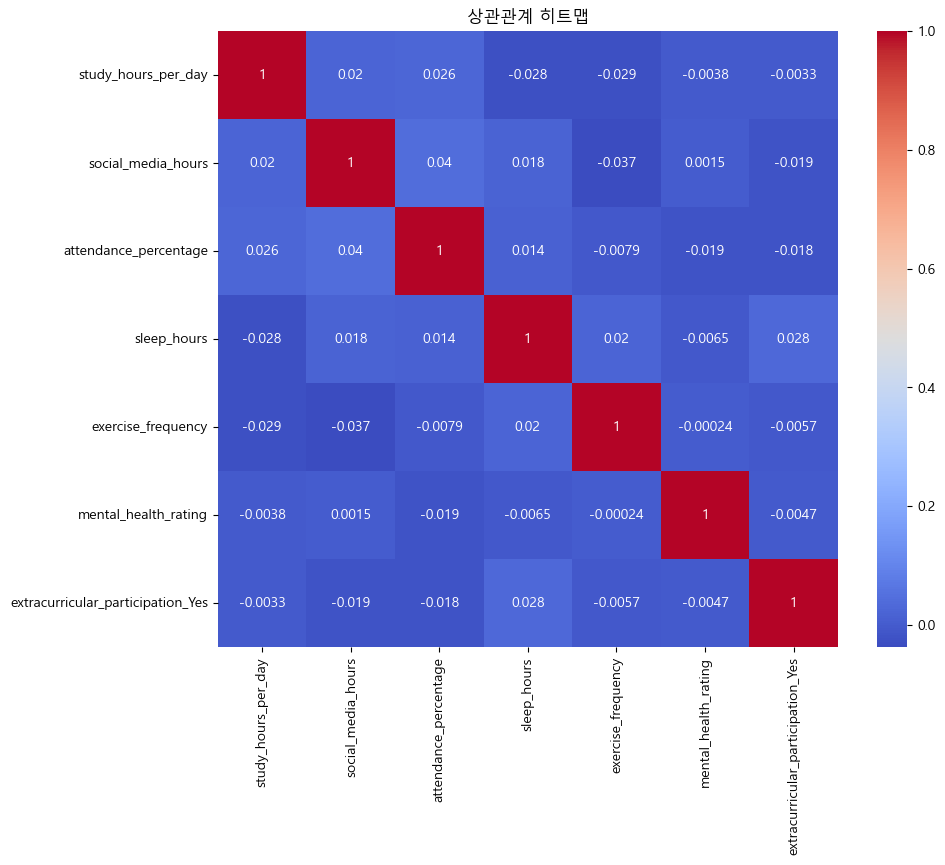

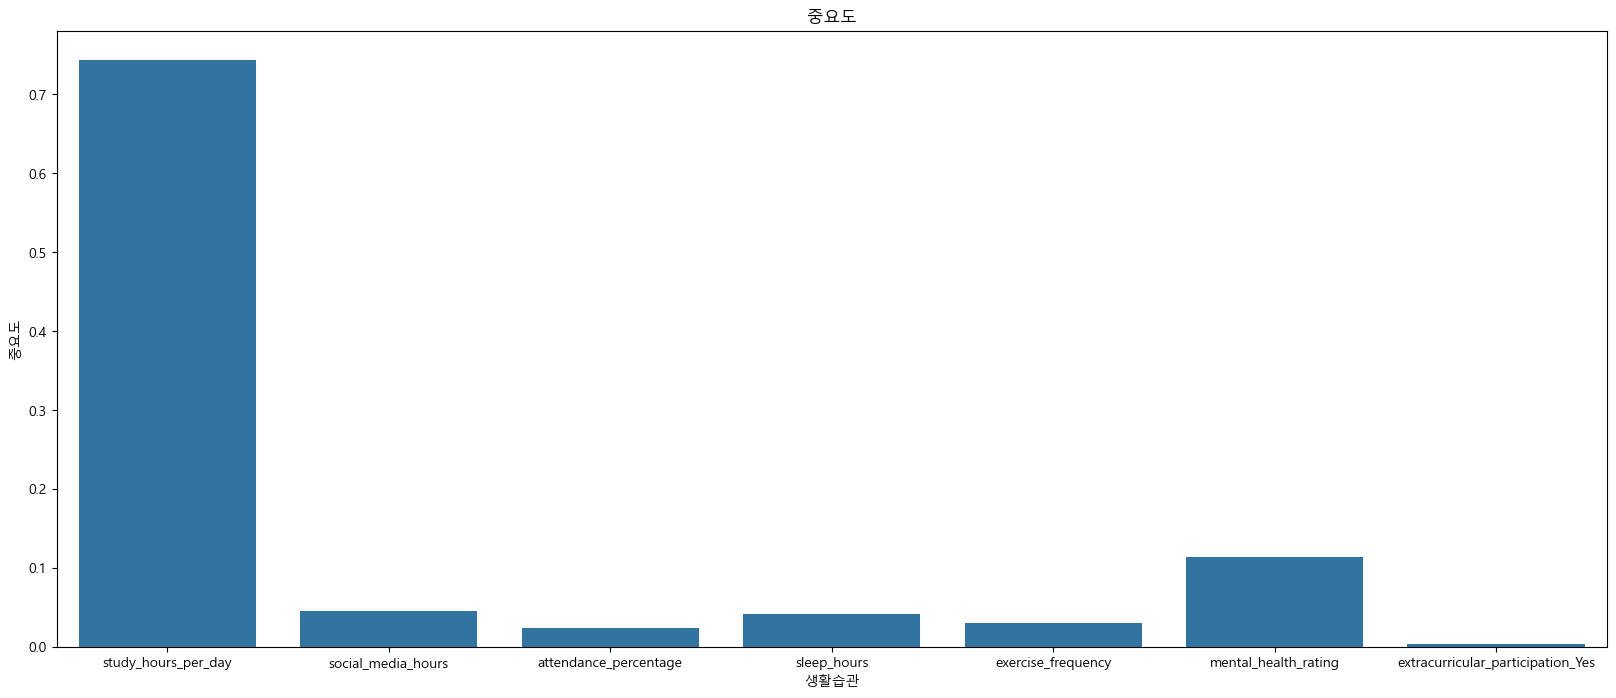

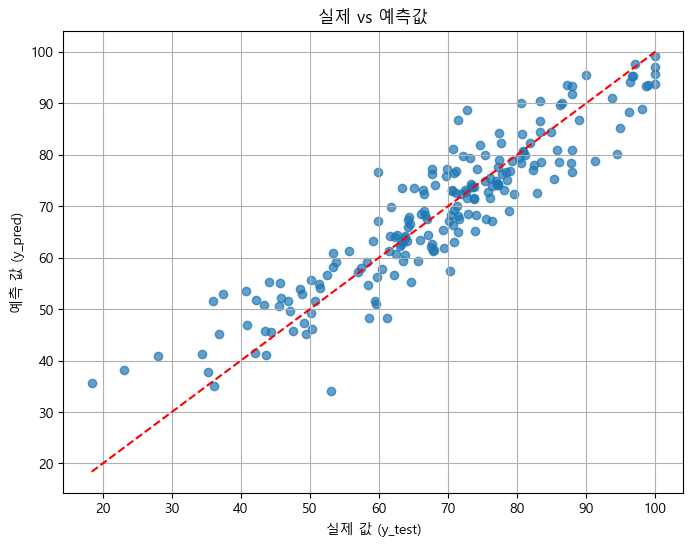

2025-06-05 09:15:41.942 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 09:15:42.585 
  command:

    streamlit run c:\Project\.venv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-05 09:15:42.586 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 09:15:43.251 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 09:15:43.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 09:15:43.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 09:15:43.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 09:15:43.253 Thread 'MainThread': missing Sc

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, accuracy_score, classification_report, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
import streamlit as st
import joblib



# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format





# 데이터 로드
data = pd.read_csv("../dataset/student_habits_performance.csv")
# data.head()
# data.info()

# 데이터 전처리
# 결측값 확인 및 처리
print("결측치 : ", data.isnull().sum())

# 원 핫 인코딩
data = pd.get_dummies(data, columns=['diet_quality', 'extracurricular_participation'], drop_first=True)
data.head()
# data = data.drop(columns=['student_id', 'age', 'gender']) # 삭제
# data2 = pd.get_dummies(data, columns=['diet_quality_Good'], drop_first=True)
# data3 = pd.get_dummies(data, columns=['diet_quality_Poor'], drop_first=True)

# 데이터 지정
X = data[['study_hours_per_day', 'social_media_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'extracurricular_participation_Yes']]
y = data['exam_score']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 데이터 학습 (하이퍼 파라미터 튜닝)
param_grid = {
    'n_estimators' : [50, 100],
    'max_depth' : [6, 8],
    'min_samples_split' : [2],
    'min_samples_leaf' : [2],
    'n_jobs': [-1]  
}
# model = RandomForestRegressor(random_state=42)
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42, n_jobs=-1), cv=3, param_grid=param_grid, verbose=1, return_train_score=False, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print("최적의 파라미터:", grid.best_params_)
print("R² 점수:", grid.best_score_)
# print("최고 모델:", grid.best_estimator_)
# print("최고 R² 점수:", grid.cv_results_)
# model.fit(X_train, y_train)
best_model = grid.best_estimator_

# 데이터 예측 (예측용 테스트 데이터)
# 변수를 넣어야 예측을 하겠죠?
y_pred = best_model.predict(X_test)

# 회귀모델 선정
model = {
    
    "Decision Tree" : DecisionTreeRegressor(random_state=42),
    # 랜덤 포레스트는 둘 다 사용가능 #Regressor는 회귀 #classifier는 분류
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-NeighborsClassifier":KNeighborsRegressor(),
    
      
}

results = {}
for name, models in model.items():
 scores = cross_val_score(models, X_train, y_train, cv=5, scoring='accuracy')
 # 밑의 방식으로 그대로 써야함
 acc = r2_score(y_test, y_pred)
 results[name] = r2_score(y_test, y_pred)
 print(f"{name} 평균 정확도: {r2_score(y_test, y_pred):.4f}")


# 교차 검증을 통한 최적의 모델 찾기
# models = {
#     "Linear Regression": LinearRegression(),
#     "Decision Tree": DecisionTreeRegressor(),
#     "Random Forest": RandomForestRegressor(),
#     "KNN": KNeighborsRegressor()
# }
# for x in model.items():
#  score = cross_val_score(model, X, y, cv=5)
 
#  x.fit(X_train, y_train)
 
joblib.dump(best_model, 'best_model.pkl')
 
# 분류 리포트
# 데이터 (성능)평가
# 결과가 잘 나왔는지 평가
ac = r2_score(y_test, y_pred)
print("Accuracy:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# # 프로파일링 리포트 생성
# profile = ProfileReport(
#     data,
#     title="EDA 보고서",
#     explorative=True,
#     html={
#         'style': {
#             'theme': 'united'  # 허용된 theme 중 하나로 변경
#         }
#     }
# )

# # 리포트 저장 및 출력
# profile.to_file("./report/MLproject_report.html")

# 중요도 확인 
importance = pd.DataFrame ({
    
     "특성" : X.columns,
     "중요도" : best_model.feature_importances_

 }).sort_values("중요도" , ascending=False)
print(importance)

# # 데이터 시각화
# # corr = X.corrwith(y).to_frame(name='상관관계')
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('상관관계 히트맵')
plt.show()

plt.figure(figsize=(20,8))
sns.barplot(x= X.columns, y= best_model.feature_importances_, data=importance)
plt.title('중요도')
plt.xlabel('생활습관')
plt.ylabel('중요도')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("실제 값 (y_test)")
plt.ylabel("예측 값 (y_pred)")
plt.title("실제 vs 예측값")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

# plt.figure(figsize=(10,10))
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('혼동 행렬')
# plt.xlabel('예측값')
# plt.ylabel('실제값')
# plt.show()


# Streamlit 앱
st.title("습관에 따른 성적 예측 프로그램")
st.bar_chart(importance.set_index('특성'))
# UI
study_hour = st.slider('study_hours_per_day', min_value=0.00, max_value=10.00)
social_media = st.slider('social_media_hours', min_value=0.00, max_value=10.00)
attendance_percentage = st.slider('attendance_percentage', min_value=0.00, max_value=100.00)
sleep_hour = st.slider('sleep_hours', min_value=0.00, max_value=10.00)
exercise_frequency = st.slider('exercise_frequency', min_value=0.00, max_value=10.00)
mental_health_rating  = st.slider('mental_health_rating', min_value=0.00, max_value=10.00)

# 사용자가 Diet Quality 선택
# diet_quality = st.selectbox("Select Diet Quality", options=["Good", "Poor"])

# 원-핫 인코딩 변환
# diet_quality_good = 1 if diet_quality == "Good" else 0
# diet_quality_poor = 1 if diet_quality == "Poor" else 0


if st.button("예측하기"):
    #피클통 불러오기
    best_model = joblib.load('best_model.pkl')
    #데이터 불러오기 (위)
    best_data = np.array([[study_hour, social_media, attendance_percentage, sleep_hour, exercise_frequency, mental_health_rating]])
    #가능성과 확률 예측하기
    prediction = best_model.predict(best_data)[0]
    # proba = best_model.predict_proba(best_data)[0]
    st.write(f"당신의 성적은 {prediction:.2f}점 으로 예측됩니다")
